In [1]:
import numpy as np
from matplotlib import pyplot as plt

from agents import policy_agent
from algorithms import Tabular_q,SARSA,get_F,learn_matrices, Tdzero
from environments import random_MDP
from functions import Multi_Qs_to_F,Multi_Vs_to_F
from misc import compareplot
from wrapper import partial_env_A_multireward

np.random.seed(0)
k=25

C:\Users\flodo\Anaconda3\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\flodo\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.IPBC74C7KURV7CB2PKT5Z5FNR3SIBV4J.gfortran-win_amd64.dll
C:\Users\flodo\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
C:\Users\flodo\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.txa6yqsd3gcqqc22geq54j2udcxdxhwn.gfortran-win_amd64.dll
  stacklevel=1)


In [2]:
random_dict={key:[0.25,0.25,0.25,0.25] for key in range(100)}
random=policy_agent(random_dict,4)

k=5
episodes=(np.arange(5)+1)*5000

QW=[]
VW=[]
QB=[]
VB=[]

for e in episodes:
    sWs=[]
    sBs=[]
    for i in range(k):
        env,W_True,B_True=random_MDP(10,4,6)
        b=partial_env_A_multireward(env,np.arange(6),[6,7,8,9])
        F,W,B=get_F(env,e,4,random_dict
            ,np.arange(6),[6,7,8,9],c=100000,episode_length=100,epsilon=0,
                  alpha=lambda x,y: 10/(x+10),evaluation="SARSA",re_evaluation_factor=1)
        sWs.append(np.linalg.norm(W-W_True,ord=np.inf))
        sBs.append(np.linalg.norm(B-B_True,ord=np.inf))
    QW.append(sWs)
    QB.append(sBs)
    print(np.mean(sWs))
    
    sWs=[]
    sBs=[]
    for i in range(k):
        env,W_True,B_True=random_MDP(10,4,6)
        b=partial_env_A_multireward(env,np.arange(6),[6,7,8,9])
        F,W,B=get_F(env,e,4,random_dict
           ,np.arange(6),[6,7,8,9],c=100000,episode_length=100,epsilon=0,
                  alpha=lambda x,y: 10/(x+10), evaluation="td",re_evaluation_factor=1)
        sWs.append(np.linalg.norm(W-W_True,ord=np.inf))
        sBs.append(np.linalg.norm(B-B_True,ord=np.inf))
    VW.append(sWs)
    VB.append(sBs)
    print(np.mean(sWs))


compareplot(episodes,[VW,QW],
            ["V_indirect","Q_indirect"],["b","orange"],
            title="Random_MDP(10,4,6) decaying alpha",xlabel="log 10 episodes",ylabel="error in W",ylim=(0,3))

compareplot(episodes,[VB,QB],
            ["V_indirect","Q_indirect"],["b","orange"],
            title="Random_MDP(10,4,6) decaying alpha",xlabel="log 10 episodes",ylabel="error in B",ylim=(0,3))

0.07056830551410305


KeyboardInterrupt: 

In [ ]:
print(VW)
print(QW)

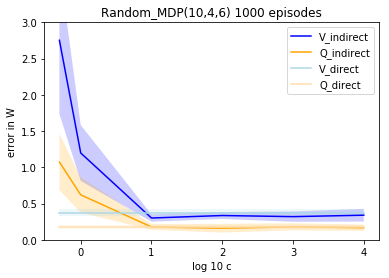

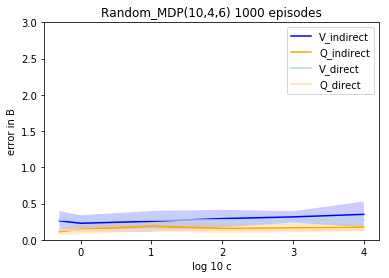

In [2]:
random_dict={key:[0.25,0.25,0.25,0.25] for key in range(100)}
random=policy_agent(random_dict,4)
k=5

cs=[0.5,1,10,100,1000,10000]

QW=[]
VW=[]
QB=[]
VB=[]

for c in cs:
    sWs=[]
    sBs=[]
    for i in range(k):
        env,W_True,B_True=random_MDP(10,4,6)
        b=partial_env_A_multireward(env,np.arange(6),[6,7,8,9])
        F,W,B=get_F(env,1000,4,random_dict
            ,np.arange(6),[6,7,8,9],c=c,episode_length=100,epsilon=0,
                  alpha=lambda x,y:0.1,evaluation="SARSA",re_evaluation_factor=1)
        sWs.append(np.linalg.norm(W-W_True,ord=np.inf))
        sBs.append(np.linalg.norm(B-B_True,ord=np.inf))
    QW.append(sWs)
    QB.append(sBs)

    
    sWs=[]
    sBs=[]
    for i in range(k):
        env,W_True,B_True=random_MDP(10,4,6)
        b=partial_env_A_multireward(env,np.arange(6),[6,7,8,9])
        F,W,B=get_F(env,1000,4,random_dict
           ,np.arange(6),[6,7,8,9],c=c,episode_length=100,epsilon=0,
                  alpha=lambda x,y:0.1,evaluation="td",re_evaluation_factor=1)
        sWs.append(np.linalg.norm(W-W_True,ord=np.inf))
        sBs.append(np.linalg.norm(B-B_True,ord=np.inf))
    VW.append(sWs)
    VB.append(sBs)
    
sWs=[]
sBs=[]    
for i in range(k):
    env,W_True,B_True=random_MDP(10,4,6)
    b=partial_env_A_multireward(env,np.arange(6),[6,7,8,9])
    Qs=SARSA(b,1000,4,random,episode_length=100,epsilon=0,alpha=lambda x,y:0.1)
    F,W,B=Multi_Qs_to_F(random_dict,Qs,np.arange(6))
    sWs.append(np.linalg.norm(W-W_True,ord=np.inf))
    sBs.append(np.linalg.norm(B-B_True,ord=np.inf))


QdW=sWs
QdB=sBs

sWs=[]
sBs=[]
for i in range(k):
    env,W_True,B_True=random_MDP(10,4,6)
    b=partial_env_A_multireward(env,np.arange(6),[6,7,8,9])
    Vs=Tdzero(b,1000,4,random,episode_length=100,epsilon=0,alpha=lambda x,y:0.1)
    F,W,B=Multi_Vs_to_F(random_dict,Vs,np.arange(6))
    sWs.append(np.linalg.norm(W-W_True,ord=np.inf))
    sBs.append(np.linalg.norm(B-B_True,ord=np.inf))

VdW=sWs
VdB=sBs

compareplot(np.log10(cs),[VW,QW,[VdW for i in cs],[QdW for i in cs]],
            ["V_indirect","Q_indirect","V_direct","Q_direct"],["b","orange","lightblue","navajowhite"],
            title="Random_MDP(10,4,6) 1000 episodes",xlabel="log 10 c",ylabel="error in W",ylim=(0,3))

compareplot(np.log10(cs),[VB,QB,[VdB for i in cs],[QdB for i in cs]],
            ["V_indirect","Q_indirect","V_direct","Q_direct"],["b","orange","lightblue","navajowhite"],
            title="Random_MDP(10,4,6) 1000 episodes",xlabel="log 10 c",ylabel="error in B",ylim=(0,3))

In [1]:
random_dict_8={key:[0.125,0.125,0.125,0.125,0.125,0.125,0.125,0.125] for key in range(100)}
random_8=policy_agent(random_dict_8,8)
alpha=[0.001,0.005,0.01,0.05,0.1,0.5,1]
probW=[]
QW=[]
VW=[]
probB=[]
QB=[]
VB=[]
for a in alpha:
    sWs=[]
    sBs=[]
    for i in range(k):
        env,W_True,B_True=random_MDP(10,8,6)
        b=partial_env_A_multireward(env,np.arange(6),[6,7,8,9])
        Vs=Tdzero(b,1000,8,random_8,episode_length=100,epsilon=0,alpha=lambda x,y:a)
        F,W,B=Multi_Vs_to_F(random_dict_8,Vs,np.arange(6))
        sWs.append(np.linalg.norm(W-W_True,ord=np.inf))
        sBs.append(np.linalg.norm(B-B_True,ord=np.inf))
    VW.append(sWs)
    VB.append(sBs)
    
    sWs=[]
    sBs=[]
    for i in range(k):
        env,W_True,B_True=random_MDP(10,8,6)
        b=partial_env_A_multireward(env,np.arange(6),[6,7,8,9])
        Qs=SARSA(b,1000,8,random_8,episode_length=100,epsilon=0,alpha=lambda x,y:a)
        F,W,B=Multi_Qs_to_F(random_dict_8,Qs,np.arange(6))
        sWs.append(np.linalg.norm(W-W_True,ord=np.inf))
        sBs.append(np.linalg.norm(B-B_True,ord=np.inf))
    QW.append(sWs)
    QB.append(sBs)
    
    
compareplot(np.log10(alpha),[VW,QW],
            ["V","Q"],["b","orange"],
            title="Random_MDP(10,8,6) 2000 episodes",xlabel="log 10 alpha",ylabel="error in W",ylim=None)

compareplot(np.log10(alpha),[VB,QB],
            ["V","Q"],["b","orange"],
           title="Random_MDP(10,8,6) 2000 episodes", xlabel="log 10 alpha",ylabel="error in B",ylim=None)

alpha=[0.001,0.005,0.01,0.05,0.1,0.5,1]
probW=[]
QW=[]
VW=[]
probB=[]
QB=[]
VB=[]
for a in alpha:
    sWs=[]
    sBs=[]
    for i in range(k):
        env,W_True,B_True=random_MDP(10,8,6)
        b=partial_env_A_multireward(env,np.arange(6),[6,7,8,9])
        Vs=Tdzero(b,1000,4,random,episode_length=100,epsilon=0,alpha=lambda x,y:a)
        F,W,B=Multi_Vs_to_F(random_dict,Vs,np.arange(6))
        sWs.append(np.linalg.norm(W-W_True,ord=np.inf))
        sBs.append(np.linalg.norm(B-B_True,ord=np.inf))
    VW.append(sWs)
    VB.append(sBs)
    
    sWs=[]
    sBs=[]
    for i in range(k):
        env,W_True,B_True=random_MDP(10,8,6)
        b=partial_env_A_multireward(env,np.arange(6),[6,7,8,9])
        Qs=SARSA(b,1000,4,random,episode_length=100,epsilon=0,alpha=lambda x,y:a)
        F,W,B=Multi_Qs_to_F(random_dict,Qs,np.arange(6))
        sWs.append(np.linalg.norm(W-W_True,ord=np.inf))
        sBs.append(np.linalg.norm(B-B_True,ord=np.inf))
    QW.append(sWs)
    QB.append(sBs)
    
    
compareplot(np.log10(alpha),[VW,QW],
            ["V","Q"],["b","orange"],
            title="Random_MDP(10,4,6) 1000 episodes",xlabel="log 10 alpha",ylabel="error in W",ylim=None)

compareplot(np.log10(alpha),[VB,QB],
            ["V","Q"],["b","orange"],
           title="Random_MDP(10,4,6) 1000 episodes", xlabel="log 10 alpha",ylabel="error in B",ylim=None)


episodes=(np.arange(5)+1)*500
probW=[]
QW=[]
VW=[]
probB=[]
QB=[]
VB=[]
for e in episodes:
    sWs=[]
    sBs=[]
    for i in range(k):
        env,W_True,B_True=random_MDP(10,4,6)
        b=partial_env_A_multireward(env,np.arange(6),[6,7,8,9])
        F,W,B=learn_matrices(env,e,random,np.arange(6),[6,7,8,9])
        sWs.append(np.linalg.norm(W-W_True,ord=np.inf))
        sBs.append(np.linalg.norm(B-B_True,ord=np.inf))
    probW.append(sWs)
    probB.append(sBs)
    
    sWs=[]
    sBs=[]
    for i in range(k):
        env,W_True,B_True=random_MDP(10,4,6)
        b=partial_env_A_multireward(env,np.arange(6),[6,7,8,9])
        Qs=SARSA(b,e,4,random,episode_length=100,epsilon=0,alpha=lambda x,y:0.1)
        F,W,B=Multi_Qs_to_F(random_dict,Qs,np.arange(6))
        sWs.append(np.linalg.norm(W-W_True,ord=np.inf))
        sBs.append(np.linalg.norm(B-B_True,ord=np.inf))
    QW.append(sWs)
    QB.append(sBs)
    
    sWs=[]
    sBs=[]
    for i in range(k):
        env,W_True,B_True=random_MDP(10,4,6)
        b=partial_env_A_multireward(env,np.arange(6),[6,7,8,9])
        Vs=Tdzero(b,e,4,random,episode_length=100,epsilon=0,alpha=lambda x,y:0.1)
        F,W,B=Multi_Vs_to_F(random_dict,Vs,np.arange(6))
        sWs.append(np.linalg.norm(W-W_True,ord=np.inf))
        sBs.append(np.linalg.norm(B-B_True,ord=np.inf))
    VW.append(sWs)
    VB.append(sBs)
    
    
compareplot(episodes,[VW,QW,probW],
            ["V","Q","Prob"],["b","orange","k"],
            title="Random_MDP(10,4,6) alpha=0.1",xlabel="episodes",ylabel="error in W",ylim=None)

compareplot(episodes,[VB,QB,probB],
            ["V","Q","Prob"],["b","orange","k"],
            title="Random_MDP(10,4,6) alpha=0.1",xlabel="episodes",ylabel="error in B",ylim=None)
    
              
                   
    


def alpha(v,t):
    return 1/(v+1)
episodes=(np.arange(5)+1)*500
probW=[]
QW=[]
VW=[]
probB=[]
QB=[]
VB=[]
for e in episodes:
    sWs=[]
    sBs=[]
    for i in range(k):
        env,W_True,B_True=random_MDP(10,4,6)
        b=partial_env_A_multireward(env,np.arange(6),[6,7,8,9])
        F,W,B=learn_matrices(env,e,random,np.arange(6),[6,7,8,9])
        sWs.append(np.linalg.norm(W-W_True,ord=np.inf))
        sBs.append(np.linalg.norm(B-B_True,ord=np.inf))
    probW.append(sWs)
    probB.append(sBs)
    
    sWs=[]
    sBs=[]
    for i in range(k):
        env,W_True,B_True=random_MDP(10,4,6)
        b=partial_env_A_multireward(env,np.arange(6),[6,7,8,9])
        Qs=SARSA(b,e,4,random,episode_length=100,epsilon=0,alpha=alpha)
        F,W,B=Multi_Qs_to_F(random_dict,Qs,np.arange(6))
        sWs.append(np.linalg.norm(W-W_True,ord=np.inf))
        sBs.append(np.linalg.norm(B-B_True,ord=np.inf))
    QW.append(sWs)
    QB.append(sBs)
    
    sWs=[]
    sBs=[]
    for i in range(k):
        env,W_True,B_True=random_MDP(10,4,6)
        b=partial_env_A_multireward(env,np.arange(6),[6,7,8,9])
        Vs=Tdzero(b,e,4,random,episode_length=100,epsilon=0,alpha=alpha)
        F,W,B=Multi_Vs_to_F(random_dict,Vs,np.arange(6))
        sWs.append(np.linalg.norm(W-W_True,ord=np.inf))
        sBs.append(np.linalg.norm(B-B_True,ord=np.inf))
    VW.append(sWs)
    VB.append(sBs)
    
    
compareplot(episodes,[VW,QW,probW],
            ["V","Q","Prob"],["b","orange","k"],
            title="Random_MDP(10,4,6) alpha decay",xlabel="episodes",ylabel="error in W",ylim=None)

compareplot(episodes,[VB,QB,probB],
            ["V","Q","Prob"],["b","orange","k"],
            title="Random_MDP(10,4,6) alpha decay",xlabel="episodes",ylabel="error in B",ylim=None)
    
              
                   
    


def alpha(v,t):
    return 5/(v+5)
episodes=(np.arange(5)+1)*500
probW=[]
QW=[]
VW=[]
probB=[]
QB=[]
VB=[]
for e in episodes:
    sWs=[]
    sBs=[]
    for i in range(k):
        env,W_True,B_True=random_MDP(10,4,6)
        b=partial_env_A_multireward(env,np.arange(6),[6,7,8,9])
        F,W,B=learn_matrices(env,e,random,np.arange(6),[6,7,8,9])
        sWs.append(np.linalg.norm(W-W_True,ord=np.inf))
        sBs.append(np.linalg.norm(B-B_True,ord=np.inf))
    probW.append(sWs)
    probB.append(sBs)
    
    sWs=[]
    sBs=[]
    for i in range(k):
        env,W_True,B_True=random_MDP(10,4,6)
        b=partial_env_A_multireward(env,np.arange(6),[6,7,8,9])
        Qs=SARSA(b,e,4,random,episode_length=100,epsilon=0,alpha=alpha)
        F,W,B=Multi_Qs_to_F(random_dict,Qs,np.arange(6))
        sWs.append(np.linalg.norm(W-W_True,ord=np.inf))
        sBs.append(np.linalg.norm(B-B_True,ord=np.inf))
    QW.append(sWs)
    QB.append(sBs)
    
    sWs=[]
    sBs=[]
    for i in range(k):
        env,W_True,B_True=random_MDP(10,4,6)
        b=partial_env_A_multireward(env,np.arange(6),[6,7,8,9])
        Vs=Tdzero(b,e,4,random,episode_length=100,epsilon=0,alpha=alpha)
        F,W,B=Multi_Vs_to_F(random_dict,Vs,np.arange(6))
        sWs.append(np.linalg.norm(W-W_True,ord=np.inf))
        sBs.append(np.linalg.norm(B-B_True,ord=np.inf))
    VW.append(sWs)
    VB.append(sBs)
    
    
compareplot(episodes,[VW,QW,probW],
            ["V","Q","Prob"],["b","orange","k"],
            title="Random_MDP(10,4,6) alpha decay 5",xlabel="episodes",ylabel="error in W",ylim=None)

compareplot(episodes,[VB,QB,probB],
            ["V","Q","Prob"],["b","orange","k"],
            title="Random_MDP(10,4,6) alpha decay 5",xlabel="episodes",ylabel="error in B",ylim=None)
    
              
                   
    


def alpha(v,t):
    return 1/(v+1)
episodes=(np.arange(5)+1)*2000
probW=[]
QW=[]
VW=[]
probB=[]
QB=[]
VB=[]
for e in episodes:
    sWs=[]
    sBs=[]
    for i in range(k):
        env,W_True,B_True=random_MDP(50,4,46)
        b=partial_env_A_multireward(env,np.arange(46),[46,47,48,49])
        F,W,B=learn_matrices(env,e,random,np.arange(46),[46,47,48,49])
        sWs.append(np.linalg.norm(W-W_True,ord=np.inf))
        sBs.append(np.linalg.norm(B-B_True,ord=np.inf))
    probW.append(sWs)
    probB.append(sBs)
    
    sWs=[]
    sBs=[]
    for i in range(k):
        env,W_True,B_True=random_MDP(50,4,46)
        b=partial_env_A_multireward(env,np.arange(46),[46,47,48,49])
        Qs=SARSA(b,e,4,random,episode_length=100,epsilon=0,alpha=alpha)
        F,W,B=Multi_Qs_to_F(random_dict,Qs,np.arange(46))
        sWs.append(np.linalg.norm(W-W_True,ord=np.inf))
        sBs.append(np.linalg.norm(B-B_True,ord=np.inf))
    QW.append(sWs)
    QB.append(sBs)
    
    sWs=[]
    sBs=[]
    for i in range(k):
        env,W_True,B_True=random_MDP(50,4,46)
        b=partial_env_A_multireward(env,np.arange(46),[46,47,48,49])
        Vs=Tdzero(b,e,4,random,episode_length=100,epsilon=0,alpha=alpha)
        F,W,B=Multi_Vs_to_F(random_dict,Vs,np.arange(46))
        sWs.append(np.linalg.norm(W-W_True,ord=np.inf))
        sBs.append(np.linalg.norm(B-B_True,ord=np.inf))
    VW.append(sWs)
    VB.append(sBs)
    
    
compareplot(episodes,[VW,QW,probW],
            ["V","Q","Prob"],["b","orange","k"],
            title="Random_MDP(50,4,46) alpha decay",xlabel="episodes",ylabel="error in W",ylim=None)

compareplot(episodes,[VB,QB,probB],
            ["V","Q","Prob"],["b","orange","k"],
            title="Random_MDP(50,4,46) alpha decay",xlabel="episodes",ylabel="error in B",ylim=None)
    
              
                   
    


def alpha(v,t):
    return 10/(v+10)
episodes=(np.arange(5)+1)*2000
probW=[]
QW=[]
VW=[]
probB=[]
QB=[]
VB=[]
for e in episodes:
    sWs=[]
    sBs=[]
    for i in range(k):
        env,W_True,B_True=random_MDP(50,4,46)
        b=partial_env_A_multireward(env,np.arange(46),[46,47,48,49])
        F,W,B=learn_matrices(env,e,random,np.arange(46),[46,47,48,49])
        sWs.append(np.linalg.norm(W-W_True,ord=np.inf))
        sBs.append(np.linalg.norm(B-B_True,ord=np.inf))
    probW.append(sWs)
    probB.append(sBs)
    
    sWs=[]
    sBs=[]
    for i in range(k):
        env,W_True,B_True=random_MDP(50,4,46)
        b=partial_env_A_multireward(env,np.arange(46),[46,47,48,49])
        Qs=SARSA(b,e,4,random,episode_length=100,epsilon=0,alpha=alpha)
        F,W,B=Multi_Qs_to_F(random_dict,Qs,np.arange(46))
        sWs.append(np.linalg.norm(W-W_True,ord=np.inf))
        sBs.append(np.linalg.norm(B-B_True,ord=np.inf))
    QW.append(sWs)
    QB.append(sBs)
    
    sWs=[]
    sBs=[]
    for i in range(k):
        env,W_True,B_True=random_MDP(50,4,46)
        b=partial_env_A_multireward(env,np.arange(46),[46,47,48,49])
        Vs=Tdzero(b,e,4,random,episode_length=100,epsilon=0,alpha=alpha)
        F,W,B=Multi_Vs_to_F(random_dict,Vs,np.arange(46))
        sWs.append(np.linalg.norm(W-W_True,ord=np.inf))
        sBs.append(np.linalg.norm(B-B_True,ord=np.inf))
    VW.append(sWs)
    
    
compareplot(episodes,[VW,QW,probW],
            ["V","Q","Prob"],["b","orange","k"],
            title="Random_MDP(50,4,46) alpha decay 10",xlabel="episodes",ylabel="error in W",ylim=None)

compareplot(episodes,[VB,QB,probB],
            ["V","Q","Prob"],["b","orange","k"],
            title="Random_MDP(50,4,46) alpha decay 10",xlabel="episodes",ylabel="error in B",ylim=None)
    
              
                   
    

ModuleNotFoundError: No module named 'agents'